In [1]:
from scipy.stats import shapiro
from scipy.stats import skew
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sys

In [2]:
#Uploading the collected data and AI's advices
df = pd.read_csv(r'C:\\Users\\Christina\\Desktop\\XAI\\XAI - App\\XAI - APP\\App\\Results.txt')
df_2=pd.read_csv(r'C:\\Users\\Christina\\Desktop\\XAI\\XAI - App\\XAI - APP\\App\\AI_Guesses.txt')

In [3]:
#Displaying collected data
df

,ID-Number,Group,Gender,Age,Nationality,Highest degree of education,Been Berlin,Been Hamburg,Been Jerusalem,Been TelAviv,...,11-2-Sel,11-2-Conf,12-1-Sel,12-1-Conf,12-2-Trust,12-2-Dec-R,12-2-Sel,12-2-Conf,13-1-Sel,Time
0,1,XAI,Male,25,German,Undergraduate Studies,Yes,Yes,No,No,...,Berlin,2,Jerusalem,3,3,Yes,Jerusalem,4,Hamburg,15
1,2,XAI,Female,21,German,Middle School,Yes,No,No,No,...,Berlin,4,Jerusalem,5,5,Yes,Jerusalem,5,Hamburg,15
2,3,XAI,Male,28,German,Graduate Studies,Yes,Yes,No,No,...,Berlin,4,Tel Aviv,1,2,No,Jerusalem,1,Hamburg,15
3,4,AI,Male,24,German,Undergraduate Studies,Yes,No,No,No,...,Berlin,4,Jerusalem,3,4,NaN,Jerusalem,4,Hamburg,13
4,5,XAI,Female,23,German,Graduate Studies,No,No,No,No,...,Berlin,4,Tel Aviv,4,3,No,Tel Aviv,3,Hamburg,13
5,6,AI,Female,25,Swiss,Undergraduate Studies,Yes,Yes,No,No,...,Berlin,4,Tel Aviv,1,3,NaN,Jerusalem,2,Hamburg,14
6,7,XAI,Female,24,German,Undergraduate Studies,No,No,No,No,...,Berlin,4,Tel Aviv,3,3,Yes,Tel Aviv,3,Hamburg,19
7,8,AI,Male,27,German,Graduate Studies,Yes,No,No,No,...,Berlin,4,Tel Aviv,2,4,NaN,Jerusalem,2,Hamburg,11
8,9,XAI,Female,24,German,Undergraduate Studies,Yes,No,No,No,...,Berlin,5,Tel Aviv,1,4,Yes,Jerusalem,4,Hamburg,13
9,10,AI,Female,24,German,Graduate Studies,Yes,Yes,No,No,...,Berlin,3,Tel Aviv,3,3,NaN,Jerusalem,3,Hamburg,14


For selection (Sel), trust, confidence (Conf), decision reason (Dec-R) applies: First number is the round number, the second number indicates whether it was chosed before (1) or after (2) seeing AI's advice. Thus, 11-1-Sel refers to the eleventh round (11) before seeing AI's advice (1).

## Analysis of General Information (Attention Check, Time, Age, Gender, Highest Degree)

 ### Attention Check

In [4]:
attention_check_not_passed=[]

for j in range(len(df)):
    if df['13-1-Sel'][j] != 'Hamburg':
        attention_check_not_passed.append(df['ID-number'][j])

if attention_check_not_passed==[]:
    print('All participants passed the attention check.')

All participants passed the attention check.


### Duration per Group (AI and XAI)

In [5]:
# Calculating processing time for both groups, AI and XAI
xai_time=[]
ai_time=[]

for j in range(len(df)):
    if df['Group'][j] == 'AI':
        ai_time.append(df[f'Time'][j])
    if df['Group'][j] == 'XAI':
        xai_time.append(df[f'Time'][j])

print('Time ai-group')
print(np.mean([ai_time]), ' (mean)')
print((np.std([ai_time]))*(math.sqrt((len(ai_time))/(len(ai_time)-1))),' (std)')
print(np.median([ai_time]),' (median)')
print((np.mean([ai_time])/12),' (mean per round)')
print('min', np.min([ai_time]),'; max', np.max([ai_time]))
        
print('\nTime xai-group')
print(np.mean([xai_time]),' (mean)')
print((np.std([xai_time]))*(math.sqrt((len(xai_time))/(len(xai_time)-1))),' (std)')
print(np.median([xai_time]),' (median)')
print((np.mean([xai_time])/12),' (mean per round)')
print('min', np.min([xai_time]),'; max', np.max([xai_time]))

Time ai-group
11.85  (mean)
2.0332758116683998  (std)
12.5  (median)
0.9874999999999999  (mean per round)
min 8 ; max 15

Time xai-group
14.3  (mean)
2.8855356157000873  (std)
14.5  (median)
1.1916666666666667  (mean per round)
min 10 ; max 20


Boxplot AI Time
 AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Christina\Downloads\Python (Anaconda)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


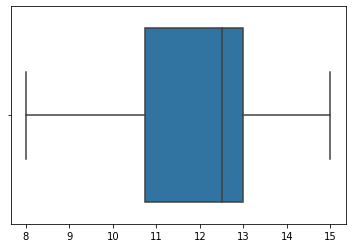

In [6]:
# Boxplot to identify outliners
print('Boxplot AI Time\n', sns.boxplot(ai_time))

Boxplot XAI Time
 AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Christina\Downloads\Python (Anaconda)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


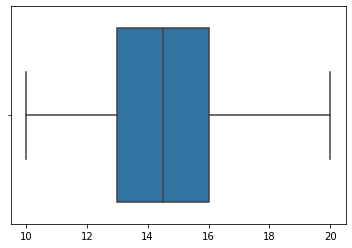

In [7]:
# Box Plot to identify outliners
print('Boxplot XAI Time\n',sns.boxplot(xai_time))

### Gender per Group

In [8]:
xai_male=[]
xai_female=[]
ai_male=[]
ai_female=[]

for j in range(0,40):
    if df['Group'][j] == 'XAI' and df['Gender'][j] == 'Female':
        xai_female.append(1) 
    if df['Group'][j] == 'XAI' and df['Gender'][j] == 'Male':
        xai_male.append(1)
    if df['Group'][j] == 'AI' and df['Gender'][j] == 'Female':
        ai_female.append(1)
    if df['Group'][j] == 'AI' and df['Gender'][j] == 'Male':
        ai_male.append(1)
  
gender_ai_vs_xai= {'AI': [sum(ai_female), sum(ai_male)], 'XAI': [sum(xai_female), sum(xai_male)]}
df_gender = pd.DataFrame(data=gender_ai_vs_xai, index=['Female', 'MAle'])


chi2_stat, p_val, dof, ex = stats.chi2_contingency(df_gender)

print('Expected observation')
print(ex, '\n')

print('Crosstable Decision Consistency AI, XAI')
print(df_gender, '\n')

print('\nChi-Quadrat-Statistik:', chi2_stat)
print('p-value:', p_val)
print('Degree of Freedom:', dof, '\n')

# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')

Expected observation
[[11.5 11.5]
 [ 8.5  8.5]] 

Crosstable Decision Consistency AI, XAI
        AI  XAI
Female   9   14
MAle    11    6 


Chi-Quadrat-Statistik: 1.636828644501279
p-value: 0.20076114663011604
Degree of Freedom: 1 

Independent (H0 holds true)


### Age per Group

In [9]:
ai_age=[]
xai_age=[]

for j in range(len(df)):
    if df['Group'][j] == 'AI':
        ai_age.append(df['Age'][j])
    if df['Group'][j] == 'XAI':
        xai_age.append(df['Age'][j]) 

print('List of Age AI:', ai_age)
print('List of Age XAI:', xai_age, '\n')

print('AI group: mean', np.mean([ai_age]), 'min', np.min(ai_age), 'max', np.max(ai_age),'median', np.median(ai_age), 'std', (np.std([ai_age]))*(math.sqrt((len(ai_age))/(len(ai_age)-1))))
print('XAI group: mean', np.mean([xai_age]),'min', np.min(xai_age), 'max', np.max(xai_age), 'median', np.median(xai_age), 'std', (np.std([xai_age]))*(math.sqrt((len(xai_age))/(len(xai_age)-1))), '\n')


print('Testing normal distribution with Shapiro-Wilk test')
#Normal distribution ai_age?' When p-value>0.05, it is a normal distribution.
print('AI:', shapiro(ai_age))
#Normal distribution xai_age?' When p-value>0.05, it is a normal distribution.
print('XAI:', shapiro(xai_age), '\n')


import numpy as np
from scipy.stats import levene
#H0: equal variance
stat, p = levene(xai_age, ai_age)
print('Testing equality of variance with levene test:',p)

from scipy import stats
#H0: equal groups regarding the means of age
print('Testing equality of the groups with two-sided T test:',stats.ttest_ind(ai_age, xai_age, axis=0, equal_var=True, nan_policy='propagate'), '\n' )

List of Age AI: [24, 25, 27, 24, 25, 18, 35, 23, 25, 24, 17, 33, 25, 35, 27, 26, 27, 26, 27, 32]
List of Age XAI: [25, 21, 28, 23, 24, 24, 26, 22, 28, 30, 19, 24, 25, 28, 33, 28, 24, 33, 17, 28] 

AI group: mean 26.25 min 17 max 35 median 25.5 std 4.700223958829822
XAI group: mean 25.5 min 17 max 33 median 25.0 std 4.148557136618643 

Testing normal distribution with Shapiro-Wilk test
AI: ShapiroResult(statistic=0.9079260230064392, pvalue=0.05819961801171303)
XAI: ShapiroResult(statistic=0.9670026898384094, pvalue=0.6907555460929871) 

Testing equality of variance with levene test: 0.9585420159241739
Testing equality of the groups with two-sided T test: Ttest_indResult(statistic=0.5350143689268092, pvalue=0.5957570909977153) 



### Highest Degree per Group

In [10]:
ai_high=[]
ai_undergr=[]
ai_grad=[]
ai_middle=[]

xai_high=[]
xai_undergr=[]
xai_grad=[]
xai_middle=[]



for j in range(0,40):

    if df['Group'][j] == 'AI' and df['Highest degree of education'][j] == 'Middle School':
        ai_middle.append(1)
    if df['Group'][j] == 'AI' and df['Highest degree of education'][j] == 'High School':
        ai_high.append(1) 
    if df['Group'][j] == 'AI' and df['Highest degree of education'][j] == 'Undergraduate Studies':
        ai_undergr.append(1) 
    if df['Group'][j] == 'AI' and df['Highest degree of education'][j] == 'Graduate Studies':
        ai_grad.append(1) 
        
    if df['Group'][j] == 'XAI' and df['Highest degree of education'][j] == 'Middle School':
        xai_middle.append(1)
    if df['Group'][j] == 'XAI' and df['Highest degree of education'][j] == 'High School':
        xai_high.append(1) 
    if df['Group'][j] == 'XAI' and df['Highest degree of education'][j] == 'Undergraduate Studies':
        xai_undergr.append(1) 
    if df['Group'][j] == 'XAI' and df['Highest degree of education'][j] == 'Graduate Studies':
        xai_grad.append(1) 

print('In order: middle school, high school, undergraduate, graduate')
print('AI:', [sum(ai_middle),sum(ai_high),sum(ai_undergr), sum(ai_grad)],'\n')
print('XAI:',[sum(xai_middle), sum(xai_high), sum(xai_undergr), sum(xai_grad)])
print('More than 20% of the cell values are under five. Therefore, a Fishers exact test in SPSS is performed.')

In order: middle school, high school, undergraduate, graduate
AI: [2, 5, 8, 5] 

XAI: [3, 3, 7, 7]
More than 20% of the cell values are under five. Therefore, a Fishers exact test in SPSS is performed.


# Calculation of Confidence Shift 
# and  Determining Decision Consistency/Decision Shift 

In the following: 
* Positiv (pos) refers to initial decision agreement
* Negativ (neg) refers to initial decision disagreement 
____

* Yes refers to same decision reasons 
* No refers to different decision reasons
____

* Stay refers to decision consistency 
* Switch to decision shift.
____
* ConfS refers to Confidence Shift
* DecS refers to Decision Shift 
____
* per_exp refers to per task round

In [11]:
print('Advice of AI per Round (R)')
df_2

Advice of AI per Round (R)


,ID,1-R,2-R,3-R,4-R,5-R,6-R,7-R,8-R,9-R,10-R,11-R,12-R
0,AI,Jerusalem,Berlin,Tel Aviv,Hamburg,Hamburg,Tel Aviv,Tel Aviv,Berlin,Jerusalem,Hamburg,Berlin,Jerusalem


## Calculating Confidence Shift

In [12]:
# Calculating confidence shift per participant and task round
for i in range (1, 13):
    df[f'Conf_Shift_{i}']=df[f'{i}-2-Conf'] - df[f'{i}-1-Conf']

In [13]:
# Calculating confidence shift per task round and per group (AI/XAI)

pos_ConfS=dict()
neg_ConfS=dict()

pos_per_exp_ConfS=dict()
neg_per_exp_ConfS=dict()

pos_per_exp_ai_ConfS=dict()
pos_per_exp_xai_ConfS=dict()

neg_per_exp_ai_ConfS=dict()
neg_per_exp_xai_ConfS=dict()

for i in range (1, 13):
    pos_ConfS[i] = []
    neg_ConfS[i] = []
    
    pos_per_exp_ai_ConfS[i] = [] 
    pos_per_exp_xai_ConfS[i] = []
    
    neg_per_exp_ai_ConfS[i] = []
    neg_per_exp_xai_ConfS[i] = []
    
    for j in range(len(df[f'{i}-1-Sel'])):
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j]: 
            pos_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        else:
            neg_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
                
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df['Group'][j] == 'AI': 
            pos_per_exp_ai_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI': 
            pos_per_exp_xai_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
            

        if df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df['Group'][j] == 'AI': 
            neg_per_exp_ai_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        if df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI': 
            neg_per_exp_xai_ConfS[i].append(df[f'Conf_Shift_{i}'][j])

In [14]:
# Calculating confidence shift for agreement and disagreement situations
'''
Only XAI-group
Decision Confidence Shift for AI-Guess == User-Guess and Decision_Reason==Yes
Decision Confidence Shift for AI-Guess == User-Guess and Decision_Reason==No
Decision Confidence Shift for AI-Guess != User-Guess and Decision_Reason==Yes
Decision Confidence Shift for AI-Guess != User-Guess and Decision_Reason==Yes
'''

pos_yes_ConfS=dict()
pos_no_ConfS=dict()

neg_yes_ConfS=dict()
neg_no_ConfS=dict()


pos_yes_per_exp_xai_ConfS=dict()
pos_no_per_exp_xai_ConfS=dict()

neg_yes_per_exp_xai_ConfS=dict()
neg_no_per_exp_xai_ConfS=dict()


for i in range (1, 13):
    pos_yes_ConfS[i] = []
    pos_no_ConfS[i] = []
    neg_yes_ConfS[i] = []
    neg_no_ConfS[i] = []
    
    pos_yes_per_exp_xai_ConfS[i] = [] 
    pos_no_per_exp_xai_ConfS[i] = [] 
    neg_yes_per_exp_xai_ConfS[i] = []
    neg_yes_per_exp_xai_ConfS[i] = []
    for j in range(len(df[f'{i}-1-Sel'])):
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            pos_yes_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        elif df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            pos_no_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            neg_yes_ConfS[i].append(df[f'Conf_Shift_{i}'][j])
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            neg_no_ConfS[i].append(df[f'Conf_Shift_{i}'][j])

# Determining Decision Consistency 

In [15]:
# Determining Decision Consistency/decision Shift per task round. Differentiation in: group, decision reason, reliance
'''
Decision Consistency:
AI-group
XAI-group

And:
Decision Consistency for AI-Guess == User-Guess and Decision_Reason==Yes
Decision Consistency for AI-Guess == User-Guess and Decision_Reason==No
Decision Consistency for AI-Guess != User-Guess and Decision_Reason==Yes
Decision Consistency for AI-Guess != User-Guess and Decision_Reason==Yes
'''

pos_stay_xai_DecS=dict()
neg_stay_xai_DecS=dict()
pos_switch_xai_DecS=dict()
neg_switch_xai_DecS=dict()

ai_DecS=dict()
pos_stay_ai_DecS=dict()
neg_stay_ai_DecS=dict()
pos_switch_ai_DecS=dict()
neg_switch_ai_DecS=dict()

xai_DecS=dict()

pos_yes_stay_DecS=dict()
pos_no_stay_DecS=dict()


neg_yes_stay_DecS=dict()
neg_no_stay_DecS=dict()

pos_yes_switch_DecS=dict()
pos_no_switch_DecS=dict()

neg_yes_switch_DecS=dict()
neg_no_switch_DecS=dict()


pos_yes_per_exp_xai_DecS=dict()
pos_no_per_exp_xai_DecS=dict()

neg_yes_per_exp_xai_DecS=dict()
neg_no_per_exp_xai_DecS=dict()


for i in range (1, 13):
    ai_DecS[i] = []
    pos_stay_ai_DecS[i] = []
    neg_stay_ai_DecS[i] =[]
    pos_switch_ai_DecS[i] = []
    neg_switch_ai_DecS[i] =[]
    
    xai_DecS[i] = []
    pos_stay_xai_DecS[i] = []
    neg_stay_xai_DecS[i] = []
    pos_switch_xai_DecS[i] = []
    neg_switch_xai_DecS[i] =[]
    
    pos_yes_stay_DecS[i] = []
    pos_no_stay_DecS[i] = []
    neg_yes_stay_DecS[i] = []
    neg_no_stay_DecS[i] = []
    
    pos_yes_switch_DecS[i] = []
    pos_no_switch_DecS[i] = []
    neg_yes_switch_DecS[i] = []
    neg_no_switch_DecS[i] = []
    
    for j in range(len(df[f'{i}-1-Sel'])):
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'AI': 
            pos_stay_ai_DecS[i].append(1)
            ai_DecS[i].append(0)
            
        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'AI':
            pos_switch_ai_DecS[i].append(1)
            ai_DecS[i].append(1)
        if df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'AI': 
            neg_stay_ai_DecS[i].append(1)
            ai_DecS[i].append(0)
        if df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'AI':
            neg_switch_ai_DecS[i].append(1)
            ai_DecS[i].append(1) 

        if df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            pos_yes_stay_DecS[i].append(1)
            pos_stay_xai_DecS[i].append(1)
            xai_DecS[i].append(0)
        elif df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            pos_no_stay_DecS[i].append(1)
            xai_DecS[i].append(0)
            pos_stay_xai_DecS[i].append(1)
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            neg_yes_stay_DecS[i].append(1)
            neg_stay_xai_DecS[i].append(1)
            xai_DecS[i].append(0)
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] == df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            neg_no_stay_DecS[i].append(1)
            neg_stay_xai_DecS[i].append(1)
            xai_DecS[i].append(0)
            
        elif df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            pos_yes_switch_DecS[i].append(1)
            pos_switch_xai_DecS[i].append(1)
            xai_DecS[i].append(1)
        elif df_2[f'{i}-R'][0] == df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            pos_no_switch_DecS[i].append(1)
            pos_switch_xai_DecS[i].append(1)
            xai_DecS[i].append(1)
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'Yes': 
            neg_yes_switch_DecS[i].append(1)
            neg_switch_xai_DecS[i].append(1)
            xai_DecS[i].append(1)
        elif df_2[f'{i}-R'][0] != df[f'{i}-1-Sel'][j] and df[f'{i}-1-Sel'][j] != df[f'{i}-2-Sel'][j] and df['Group'][j] == 'XAI' and df[f'{i}-2-Dec-R'][j] == 'No':
            neg_no_switch_DecS[i].append(1)
            neg_switch_xai_DecS[i].append(1)
            xai_DecS[i].append(1)

In [16]:
# Observed Decision Consistency/decision Shift per task round. Differentiation in: group, decision reason, reliance
pos_stay_ai_DecShift= []
neg_stay_ai_DecShift =[]
pos_switch_ai_DecShift = []
neg_switch_ai_DecShift =[]

pos_stay_xai_DecShift= []
neg_stay_xai_DecShift =[]
pos_switch_xai_DecShift = []
neg_switch_xai_DecShift =[]

pos_yes_stay_DecShift = []
pos_no_stay_DecShift= []
neg_yes_stay_DecShift = []
neg_no_stay_DecShift= []
    
pos_yes_switch_DecShift = []
pos_no_switch_DecShift= []
neg_yes_switch_DecShift = []
neg_no_switch_DecShift= []




for i in pos_stay_ai_DecS:
    pos_stay_ai_DecShift.extend(pos_stay_ai_DecS[i])
    
for i in neg_stay_ai_DecS:
    neg_stay_ai_DecShift.extend(neg_stay_ai_DecS[i])
    
for i in pos_switch_ai_DecS:
    pos_switch_ai_DecShift.extend(pos_switch_ai_DecS[i])
    
for i in neg_switch_ai_DecS:
    neg_switch_ai_DecShift.extend(neg_switch_ai_DecS[i])
    

for i in pos_stay_xai_DecS:
    pos_stay_xai_DecShift.extend(pos_stay_xai_DecS[i])
    
for i in neg_stay_xai_DecS:
    neg_stay_xai_DecShift.extend(neg_stay_xai_DecS[i])
    
for i in pos_switch_xai_DecS:
    pos_switch_xai_DecShift.extend(pos_switch_xai_DecS[i])
    
for i in neg_switch_xai_DecS:
    neg_switch_xai_DecShift.extend(neg_switch_xai_DecS[i])
    
    
for i in pos_yes_stay_DecS:
    pos_yes_stay_DecShift.extend(pos_yes_stay_DecS[i])
    
for i in pos_no_stay_DecS:
    pos_no_stay_DecShift.extend(pos_no_stay_DecS[i])
    
for i in neg_yes_stay_DecS:
    neg_yes_stay_DecShift.extend(neg_yes_stay_DecS[i])
    
for i in neg_no_stay_DecS:
    neg_no_stay_DecShift.extend(neg_no_stay_DecS[i])
    
for i in pos_yes_switch_DecS:
    pos_yes_switch_DecShift.extend(pos_yes_switch_DecS[i])
    
for i in pos_no_switch_DecS:
    pos_no_switch_DecShift.extend(pos_no_switch_DecS[i])
    
for i in neg_yes_switch_DecS:
    neg_yes_switch_DecShift.extend(neg_yes_switch_DecS[i])
    
for i in neg_no_switch_DecS:
    neg_no_switch_DecShift.extend(neg_no_switch_DecS[i])
    
print('Decision consistency and decision shift results summarized \n\n')

print('AI-group')
print('   A Consistent')
print('Sum   pos_stay_ai      Decision Shift:', sum(pos_stay_ai_DecShift))
print('Sum   neg_stay_ai      Decision Shift:', sum(neg_stay_ai_DecShift))
print('\n   B Shift')
print('Sum   pos_switch_ai    Decision Shift:', sum(pos_switch_ai_DecShift))
print('Sum   neg_switch_ai    Decision Shift:', sum(neg_switch_ai_DecShift))

print('\n\nXAI-group')
print('   A Consistent')
print('Sum  pos_yes_stay_xai   Decision Shift:', sum(pos_yes_stay_DecShift))
print('Sum  pos_no_stay_xai    Decision Shift:', sum(pos_no_stay_DecShift))
print('Sum  neg_yes_stay_xai   Decision Shift:', sum(neg_yes_stay_DecShift))
print('Sum  neg_no_stay_xai    Decision Shift:', sum(neg_no_stay_DecShift)) 

print('\n   B Shift')
print('Sum  pos_yes_switch_xai Decision Shift:', sum(pos_yes_switch_DecShift))
print('Sum  pos_no_switch_xai  Decision Shift:', sum(pos_no_switch_DecShift))
print('Sum  neg_yes_switch_xai Decision Shift:', sum(neg_yes_switch_DecShift))
print('Sum  neg_no_switch_xai  Decision Shift:', sum(neg_no_switch_DecShift))


Decision consistency and decision shift results summarized 


AI-group
   A Consistent
Sum   pos_stay_ai      Decision Shift: 110
Sum   neg_stay_ai      Decision Shift: 69

   B Shift
Sum   pos_switch_ai    Decision Shift: 0
Sum   neg_switch_ai    Decision Shift: 61


XAI-group
   A Consistent
Sum  pos_yes_stay_xai   Decision Shift: 88
Sum  pos_no_stay_xai    Decision Shift: 45
Sum  neg_yes_stay_xai   Decision Shift: 25
Sum  neg_no_stay_xai    Decision Shift: 32

   B Shift
Sum  pos_yes_switch_xai Decision Shift: 0
Sum  pos_no_switch_xai  Decision Shift: 0
Sum  neg_yes_switch_xai Decision Shift: 33
Sum  neg_no_switch_xai  Decision Shift: 17


# Visual Explanations 

### Visual Explanations and Confidence Shift

Confidence shift as a list  (entire AI-group)
[-2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4]

AI Confidence Shift: mean 0.6833333333333333 , median 1.0 , std 1.16420341673479 ; min -2 , max 4

 Shapiro-Wilk test of normal distribution ShapiroResult(statistic=0.9173621535301208, pvalue=2.7761445919

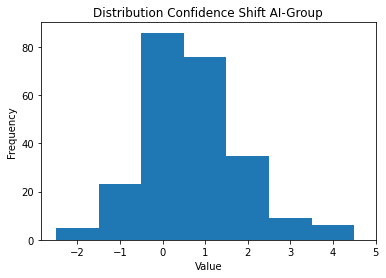

Skewness: 0.4765872013403414
The data is positively skewed.


In [17]:
print('Confidence shift as a list  (entire AI-group)')
ai_ConfS = []

for i in pos_per_exp_ai_ConfS:
    ai_ConfS.extend(pos_per_exp_ai_ConfS[i])
for i in neg_per_exp_ai_ConfS:
    ai_ConfS.extend(neg_per_exp_ai_ConfS[i])
    
print(sorted(ai_ConfS))
print('\nAI Confidence Shift: mean', np.mean(ai_ConfS),', median', np.median(ai_ConfS),', std', (np.std([ai_ConfS]))*(math.sqrt((len(ai_ConfS))/(len(ai_ConfS)-1))), '; min', np.min(ai_ConfS),', max', np.max(ai_ConfS))

#Checking whether it is a normal distribution. When p-value>0.05, it is a normal distribution.
#Normal distribution pos_yes_xai_ConfS ?'
print('\n Shapiro-Wilk test of normal distribution', shapiro(ai_ConfS))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(ai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Distribution Confidence Shift AI-Group")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

skewness = skew(ai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")

Confidence shift as a list (entire XAI-group)
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]

XAI Confidence Shift: 0.8125 , median 1.0 , std 1.117683086197312 ; min -1 , max 4

 Shapiro-Wilk test of normal distribution ShapiroResult(statistic=0.9080196619033813, pvalue=5.5434053181091514e-11)


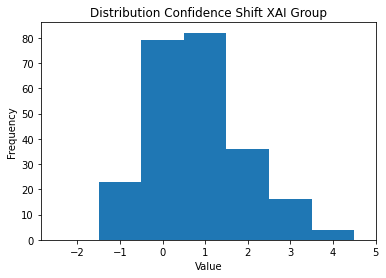

Skewness: 0.53610267418908
The data is positively skewed.


<Figure size 432x288 with 0 Axes>

In [18]:
print('Confidence shift as a list (entire XAI-group)')
xai_ConfS = []

for i in pos_per_exp_xai_ConfS:
    xai_ConfS.extend(pos_per_exp_xai_ConfS[i])
for i in neg_per_exp_xai_ConfS:
    xai_ConfS.extend(neg_per_exp_xai_ConfS[i])

print(sorted(xai_ConfS))
print('\nXAI Confidence Shift:', np.mean(xai_ConfS),', median', np.median(xai_ConfS),', std',(np.std([xai_ConfS]))*(math.sqrt((len(xai_ConfS))/(len(xai_ConfS)-1))), '; min', np.min(xai_ConfS),', max', np.max(xai_ConfS))

#Checking whether it is a normal distribution. When p-value>0.05, it is a normal distribution.
#Normal distribution pos_yes_xai_ConfS ?'
print('\n Shapiro-Wilk test of normal distribution', shapiro(xai_ConfS))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(xai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Distribution Confidence Shift XAI Group")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()  
# Saving the plot as a 'png'
plt.savefig('XAI Distribution of Confidence Shift.png')

skewness = skew(xai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")


Boxplot to visualize the differences between AI and XAI group.


<ipython-input-19-ee2af1a23bdd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['AI', 'XAI'])


<Figure size 648x432 with 0 Axes>

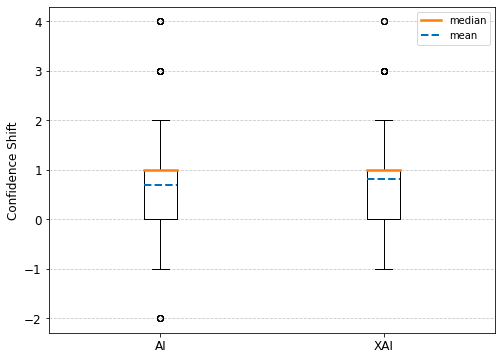

In [19]:
print('Boxplot to visualize the differences between AI and XAI group.')

data_ConfS_ai_xai = [ai_ConfS, xai_ConfS]
 
fig = plt.figure(figsize =(9, 6))

 
# Creating axes instance
fig, ax = plt.subplots(figsize =(8, 6))
ax.set_xticklabels(['AI', 'XAI'])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Confidence Shift', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
 
# Creating plot
bp1 = ax.boxplot(data_ConfS_ai_xai, patch_artist=None, meanline=True, showmeans=True, medianprops=dict(linewidth=2.5),
                meanprops=dict(linewidth=2.0, color='#0070C0'), autorange=True)

# Adding title
#plt.title("Confidence Shifts AI and XAI Group", fontsize=14)
plt.legend([bp1['medians'][0], bp1['means'][0]], ['median', 'mean'], fontsize=10)

# Saving the plot as a 'png'
plt.savefig('Confidence Shift AI and XAI  Group.svg', transparent=True, format='svg')
 
# show plot
plt.show()

In [20]:
print('Mann-Whitney-U test: AI-Group vs. XAI-Group regarding the confidence shift')
print(stats.mannwhitneyu(ai_ConfS, xai_ConfS), '\n')

# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Significantly different (reject H0)')
else:
	print('Not different (H0 holds true)')

Mann-Whitney-U test: AI-Group vs. XAI-Group regarding the confidence shift
MannwhitneyuResult(statistic=27057.5, pvalue=0.11592386458875187) 

Not different (H0 holds true)


### Visual Explanations and Decision Consistency

In [21]:
data_ai_vs_xai = {'AI': [(sum(pos_stay_ai_DecShift)+sum(neg_stay_ai_DecShift)), (sum(pos_switch_ai_DecShift)+sum(neg_switch_ai_DecShift))], 'XAI': [(sum(pos_stay_xai_DecShift)+sum(neg_stay_xai_DecShift)), (sum(pos_switch_xai_DecShift)+sum(neg_switch_xai_DecShift))]}
df_DecConsistency_ai_xai = pd.DataFrame(data=data_ai_vs_xai, index=['Decision Consistency', 'Decision Shift'])


chi2_stat, p_val, dof, ex = stats.chi2_contingency(df_DecConsistency_ai_xai)

print('Expected observation')
print(ex, '\n')
print('Crosstable Decision Consistency AI, XAI')
print(df_DecConsistency_ai_xai)
print('\nChi-Quadrat-Statistik:', chi2_stat)
print('p-value:', p_val)
print('Degree of Freedom:', dof, '\n')

# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')

Expected observation
[[184.5 184.5]
 [ 55.5  55.5]] 

Crosstable Decision Consistency AI, XAI
                       AI  XAI
Decision Consistency  179  190
Decision Shift         61   50

Chi-Quadrat-Statistik: 1.1719036109280012
p-value: 0.27901044472383935
Degree of Freedom: 1 

Independent (H0 holds true)


# Effect of Decision Reasons on Confidence Shift

In [22]:
print('Confidence shift per task round (XAI group)')
pos_per_exp_xai_ConfS, neg_per_exp_xai_ConfS

Confidence shift per task round (XAI group)


({1: [0, 1, 1, 1, 1, 1, 3, 0],
  2: [1, 1, 1, 2],
  3: [1, 1, 0, 1, 2, 1, 2, -1, 1, 3, 0, 0, 1],
  4: [1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1],
  5: [1, 3, 1, 3, 1, 1],
  6: [2, 2, 1, 1, 2, 1, 2, 0, 0, 1],
  7: [1, 1, 3, 1, 2, 2],
  8: [0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 3, 0, 0, 2, 0, 2],
  9: [1, 1, 2, 1, 0, 1, 1, 4, 1, 0, 0, 1, 0],
  10: [1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1],
  11: [0, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2],
  12: [1, 0, 2, 3, 1, 2, 3, 1, 0]},
 {1: [0, 0, 0, 3, 0, 0, 1, 3, 3, 0, 0, 0],
  2: [1, -1, -1, -1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0],
  3: [-1, -1, -1, 4, 0, 0, 0],
  4: [1, -1, 0, 0, 0, 2, -1, 0],
  5: [0, 1, 1, 0, -1, 1, 3, 1, 4, -1, -1, 2, 0, 0],
  6: [0, 0, 0, 0, 0, -1, -1, 1, 2, 0],
  7: [1, -1, -1, -1, 0, 0, 2, 0, 0, 0, 1, -1, 0, 0],
  8: [0],
  9: [-1, 0, -1, 0, 0, 0, 0],
  10: [1],
  11: [0, 4, 0, 0, 1, 0],
  12: [0, -1, 0, 3, 2, -1, 1, 0, -1, 0, 0]})

### Decision Reasons and Confidence Shift in Agreement Situations

Pos_yes ConfS XAI: mean 1.2045454545454546 , median 1.0 , std 0.8326538504635315 ; min 0 , max 3

 ShapiroResult(statistic=0.8599848747253418, pvalue=1.2509730140664033e-07)


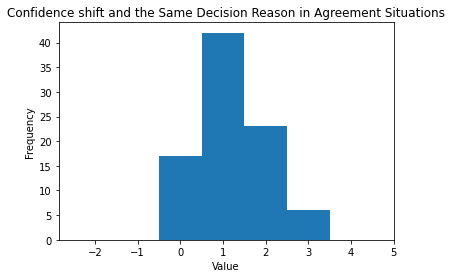

Skewness: 0.32507259974680053
The data is positively skewed.


In [23]:
# Confidence shift as a list for agreement situations and same decision reason
pos_yes_xai_ConfS = []

for i in pos_yes_ConfS:
    pos_yes_xai_ConfS.extend(pos_yes_ConfS[i])
    
print('Pos_yes ConfS XAI: mean', np.mean([pos_yes_xai_ConfS]),', median', np.median(pos_yes_xai_ConfS),', std',(np.std([pos_yes_xai_ConfS]))*(math.sqrt((len(pos_yes_xai_ConfS))/(len(pos_yes_xai_ConfS)-1))),'; min', np.min(pos_yes_xai_ConfS),', max', np.max(pos_yes_xai_ConfS))

#Checking whether it is a normal distribution. When p-value>0.05, it is a normal distribution.
#Normal distribution pos_yes_xai_ConfS ?'
print('\n', shapiro(pos_yes_xai_ConfS))


plt.hist(pos_yes_xai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Confidence shift and the Same Decision Reason in Agreement Situations")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

skewness = skew(pos_yes_xai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")

Confidence shift as a list for agreement situations and different decision reasons
Pos_no_XAI_ConfS: mean 1.1777777777777778 , median 1.0 , std 1.0507332696933147 ; min -1 , max 4

 ShapiroResult(statistic=0.889726459980011, pvalue=0.0004606983275152743)


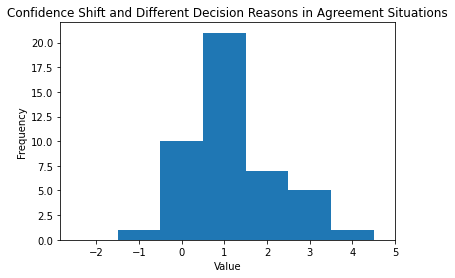

Skewness: 0.5911997411943951
The data is positively skewed.


In [24]:
print('Confidence shift as a list for agreement situations and different decision reasons') 
pos_no_xai_ConfS = []

for i in pos_no_ConfS:
    pos_no_xai_ConfS.extend(pos_no_ConfS[i])

print('Pos_no_XAI_ConfS: mean', np.mean([pos_no_xai_ConfS]),', median', np.median(pos_no_xai_ConfS),', std',(np.std([pos_no_xai_ConfS]))*(math.sqrt((len(pos_no_xai_ConfS))/(len(pos_no_xai_ConfS)-1))), '; min', np.min(pos_no_xai_ConfS),', max', np.max(pos_no_xai_ConfS))


#Normal distribution pos_no_xai_ConfS?
print('\n',shapiro(pos_no_xai_ConfS))


import matplotlib.pyplot as plt
import numpy as np
plt.hist(pos_no_xai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Confidence Shift and Different Decision Reasons in Agreement Situations")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()
from scipy.stats import skew
skewness = skew(pos_no_xai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")

Boxplot to visualize the differences between having the same decision reason  versus having different decision reasons in agreement situations.


<ipython-input-25-93da56b4bd82>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Same', 'Different'])


<Figure size 648x432 with 0 Axes>

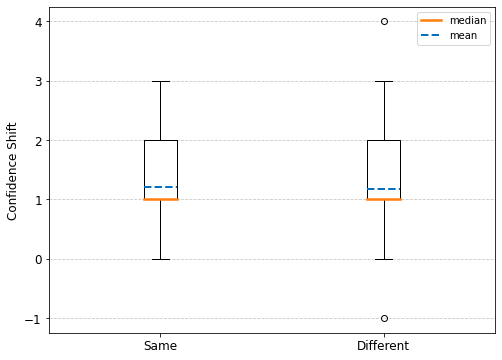

In [25]:
print('Boxplot to visualize the differences between having the same decision reason  versus having different decision reasons in agreement situations.')
data_agree_DecR_ConfS = [pos_yes_xai_ConfS, pos_no_xai_ConfS]
 
fig = plt.figure(figsize =(9, 6))
 
# Creating axes instance
fig, ax = plt.subplots(figsize =(8, 6))
ax.set_xticklabels(['Same', 'Different'])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Confidence Shift', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
 
# Creating plot
bp2 = ax.boxplot(data_agree_DecR_ConfS, patch_artist=None, meanline=True, showmeans=True, medianprops=dict(linewidth=2.5),
                meanprops=dict(linewidth=2.0, color='#0070C0'), autorange=True)
# Adding title
#plt.title("Confidence Shifts AI and XAI Group", fontsize=14)
plt.legend([bp2['medians'][0], bp2['means'][0]], ['median', 'mean'], fontsize=10)

# Saving the plot as a 'png'
plt.savefig('Confidence Shift and Decision Reason in Agreement.svg', transparent=True, format='svg')
 
# show plot
plt.show()

In [26]:
print('Two-sided Mann-Whitney-U testing whether having the same decision reasons leads to a significant different confidence shift in agreement situations') 
print(stats.mannwhitneyu(pos_yes_xai_ConfS, pos_no_xai_ConfS), '\n')
# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Significantly different (reject H0)')
else:
	print('Not significantly different (H0 holds true)')

Two-sided Mann-Whitney-U testing whether having the same decision reasons leads to a significant different confidence shift in agreement situations
MannwhitneyuResult(statistic=1889.5, pvalue=0.3234868451089099) 

Not significantly different (H0 holds true)


### Decision Reasons and Confidence Shift in Disagreement Situations

Neg_yes_XAI_ConfS: mean 0.5 , median 0.0 , std 1.2175615550562022 ; min -1 , max 4

 ShapiroResult(statistic=0.8261457085609436, pvalue=9.055345913111523e-07)


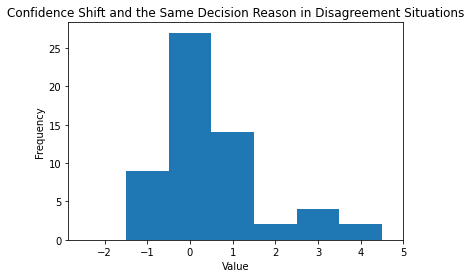

Skewness: 1.205963170282283
The data is positively skewed.


In [27]:
# Confidence shift as a list for disagreement situations and different decision reasons

neg_yes_xai_ConfS = []

for i in pos_yes_ConfS:
    neg_yes_xai_ConfS.extend(neg_yes_ConfS[i])

print('Neg_yes_XAI_ConfS: mean', np.mean([neg_yes_xai_ConfS]),', median', np.median(neg_yes_xai_ConfS),', std',(np.std([neg_yes_xai_ConfS]))*(math.sqrt((len(neg_yes_xai_ConfS))/(len(neg_yes_xai_ConfS)-1))), '; min', np.min(neg_yes_xai_ConfS),', max', np.max(neg_yes_xai_ConfS))
#Normal distribution neg_yes_xai_ConfS ?'
print('\n',shapiro(neg_yes_xai_ConfS))
    
import matplotlib.pyplot as plt
import numpy as np
plt.hist(neg_yes_xai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Confidence Shift and the Same Decision Reason in Disagreement Situations")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()


skewness = skew(neg_yes_xai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")


Neg_no_XAI_ConfS: mean 0.14285714285714285 , median 0.0 , std 1.09924216318941 ; min -1 , max 4

 ShapiroResult(statistic=0.7946381568908691, pvalue=8.063241239142371e-07)


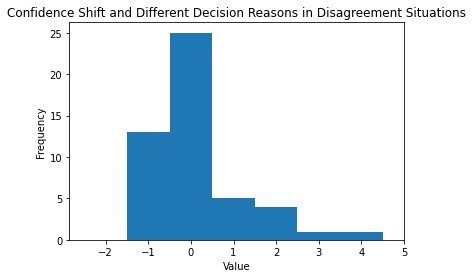

Skewness: 1.4262595293383662
The data is positively skewed.


In [28]:
# Confidence Shift as a list for disagreement situations and different decision reasons 

neg_no_xai_ConfS = []

for i in pos_yes_ConfS:
    neg_no_xai_ConfS.extend(neg_no_ConfS[i])
    
print('Neg_no_XAI_ConfS: mean', np.mean([neg_no_xai_ConfS]),', median', np.median(neg_no_xai_ConfS),', std',(np.std([neg_no_xai_ConfS]))*(math.sqrt((len(neg_no_xai_ConfS))/(len(neg_no_xai_ConfS)-1))), '; min', np.min(neg_no_xai_ConfS),', max', np.max(neg_no_xai_ConfS))

#Normal distribution neg_no_xai_ConfS ?'
print('\n',shapiro(neg_no_xai_ConfS))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(neg_no_xai_ConfS, histtype='bar', bins=range(-2,6), align='left')
plt.xticks(range(-2,6))
plt.title("Confidence Shift and Different Decision Reasons in Disagreement Situations")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()


skewness = skew(neg_no_xai_ConfS)
# Print the skewness value
print("Skewness:", skewness)

# Interpret the results
if skewness > 0:
    print("The data is positively skewed.")
elif skewness < 0:
    print("The data is negatively skewed.")
else:
    print("The data is symmetric.")


Boxplot to visualize the differences between having the same decision reason versus having different decision reasons in disagreement situations.


<ipython-input-29-593fe9b99fa9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Same', 'Different'])


<Figure size 648x432 with 0 Axes>

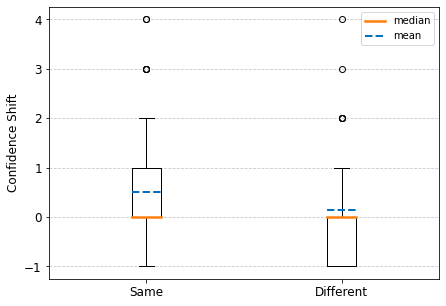

In [29]:
print('Boxplot to visualize the differences between having the same decision reason versus having different decision reasons in disagreement situations.')
data_disagree_DecR_ConfS= [neg_yes_xai_ConfS, neg_no_xai_ConfS]
 
fig = plt.figure(figsize =(9, 6))
 
# Creating axes instance
fig, ax = plt.subplots(figsize =(7, 5))
ax.set_xticklabels(['Same', 'Different'])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Confidence Shift', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
 
# Creating plot
bp3 = ax.boxplot(data_disagree_DecR_ConfS, patch_artist=None, meanline=True, showmeans=True, medianprops=dict(linewidth=2.5),
                meanprops=dict(linewidth=2.0, color='#0070C0'), autorange=True)
# Adding title
#plt.title("Confidence Shifts AI and XAI Group", fontsize=14)
plt.legend([bp3['medians'][0], bp3['means'][0]], ['median', 'mean'], fontsize=10)

# Saving the plot as a 'png'
plt.savefig('Confidence Shift and Decision Reason in Disagreement.svg', transparent=True, format='svg')
 
# show plot
plt.show()

In [30]:
print('One-sided Mann-Whitney-U testing whether same decision reasons leads to a significant higher confidence shift in disagreement situations')
print('greater', stats.mannwhitneyu(neg_yes_xai_ConfS, neg_no_xai_ConfS, use_continuity=True, alternative='greater'),'\n')

# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Equal or less (reject H0)')
else:
	print('Significantly greater (H0 holds true)')

One-sided Mann-Whitney-U testing whether same decision reasons leads to a significant higher confidence shift in disagreement situations
greater MannwhitneyuResult(statistic=1691.0, pvalue=0.035468334018797544) 

Significantly greater (H0 holds true)


# Decision Reasons and Decision Consistency

### Decision Reasons and Decision Consistency in Agreement Situations

In [31]:
data_data_agree_DecR_DecConsistency = {'Same Decision Reason':[sum(pos_yes_stay_DecShift),sum(pos_no_stay_DecShift)],'Different Decision Reason':[sum(pos_yes_switch_DecShift), sum(pos_no_switch_DecShift)]}
df4 = pd.DataFrame(data_data_agree_DecR_DecConsistency,index=['Decision Consistency', 'Decision Shift'])


print('Crosstable Decision Consistency AI, XAI')
print(df4)

print('\n Chi-square test is not possible.')

Crosstable Decision Consistency AI, XAI
                      Same Decision Reason  Different Decision Reason
Decision Consistency                    88                          0
Decision Shift                          45                          0

 Chi-square test is not possible.


### Decision Reasons and Decision Consistency in Disagreement Situations

In [32]:
data_data_disagree_DecR_DecConsistency = {'Same Decision Reason':[sum(neg_yes_stay_DecShift),sum(neg_no_stay_DecShift)],'Different Decision Reasons':[sum(neg_yes_switch_DecShift), sum(neg_no_switch_DecShift)]}
df5 = pd.DataFrame(data_data_disagree_DecR_DecConsistency,index=['Decision Consistency', 'Decision Shift'])


chi2_stat, p_val, dof, ex = stats.chi2_contingency(df5)

print('Expected observation')
print(ex, '\n')

print('Crosstable Decision Consistency in Disagreement Situations Same Decision Reason vs. Different Decision Reasons')
print(df5)

print('\nChi-Quadrat-Statistik:', chi2_stat)
print('p-value:', p_val)
print('Degree of Freedom:',dof, '\n')

# interpret p-value
alpha = 0.05
if p_val <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')

Expected observation
[[30.89719626 27.10280374]
 [26.10280374 22.89719626]] 

Crosstable Decision Consistency in Disagreement Situations Same Decision Reason vs. Different Decision Reasons
                      Same Decision Reason  Different Decision Reasons
Decision Consistency                    25                          33
Decision Shift                          32                          17

Chi-Quadrat-Statistik: 4.405739564428313
p-value: 0.03581819081773065
Degree of Freedom: 1 

Dependent (reject H0)


In [33]:
data_disagree_same_vs_differ3 = np.array(([sum(neg_yes_stay_DecShift), sum(neg_no_stay_DecShift)],[sum(neg_yes_switch_DecShift), sum(neg_no_switch_DecShift)]))
X2 = stats.chi2_contingency(data_disagree_same_vs_differ3)[0]
N = np.sum(data_disagree_same_vs_differ3)
minimum_dimension = (min(data_disagree_same_vs_differ3.shape)-1)
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print('Cramers V' ,( dof,X2),':',result)


Cramers V (1, 4.405739564428313) : 0.20291657427660378
